In [68]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

## Loading the dataset for the year 2017 to 2022

In [3]:
df2017ac = pd.read_excel('../data/yearly-counts-tube/AnnualisedEntryExit_2017.xlsx',
                         sheet_name='Annualised',
                         skiprows=6)
df2017ac.head(5)

,Mode,NLC,ASC,Station,Coverage,Source,entries,Unnamed: 7,entries.1,entries.2,exits,Unnamed: 11,exits.1,exits.2,en/ex
0,LU,500,ACTu,Acton Town,Station entry / exit,Relate,9531,0,6716,4744,9382,0,6617,4785,5.731527e+06
1,LU,502,ALDu,Aldgate,Station entry / exit,Relate,15080,0,4397,3261,16023,0,5909,4230,8.459234e+06
2,LU,503,ALEu,Aldgate East,Station entry / exit,Relate,22327,0,16166,13323,21071,0,13893,11347,1.326241e+07
3,LU,505,ALPu,Alperton,Station entry / exit,Relate,4495,0,3279,2345,5081,0,3392,2445,2.896391e+06
4,LU,506,AMEu,Amersham,Station entry / exit,Relate,3848,0,1876,1232,4025,0,1797,1121,2.215502e+06


In [4]:
df2017ac = df2017ac.drop(columns=['entries', 
                            'entries.1', 
                            'entries.2',
                            'Unnamed: 7',
                            'exits',
                            'exits.1',
                            'exits.2',
                            'Unnamed: 11']).round()

In [5]:
df2017hr = pd.read_excel('../data/yearly-counts-tube/ByQhrEntryExit_2017.xlsx',
                         sheet_name='ByQhr',
                         skiprows=6)
df2017hr=df2017hr.iloc[:, :15]
df2017hr.head(5)

,Mode,NLC,ASC,Station,Coverage,year,day,dir,Total,Early,AM Peak,Inter Peak,PM Peak,Evening,Late
0,LU,500,ACTu,Acton Town,Station entry / exit,2017,MTF,IN,9531,608,3287,2705,2029,655,247
1,LU,502,ALDu,Aldgate,Station entry / exit,2017,MTF,IN,15080,252,2774,3078,6931,1596,449
2,LU,503,ALEu,Aldgate East,Station entry / exit,2017,MTF,IN,22327,290,3225,6301,8096,3104,1311
3,LU,505,ALPu,Alperton,Station entry / exit,2017,MTF,IN,4495,558,1618,1073,831,313,102
4,LU,506,AMEu,Amersham,Station entry / exit,2017,MTF,IN,3848,538,1952,701,534,92,31


In [6]:
df2018ac = pd.read_excel('../data/yearly-counts-tube/AnnualisedEntryExit_2018.xlsx',
                         sheet_name='Annualised',
                         skiprows=6)
df2018ac.head(5)

,Mode,NLC,ASC,Station,Coverage,Source,entries,entries.1,entries.2,entries.3,exits,exits.1,exits.2,exits.3,en/ex
0,LU,500,ACTu,Acton Town,Station entry / exit,Gateline,9705,10159,6363,4971,9696,10014,6551,5032,5.794685e+06
1,LU,502,ALDu,Aldgate,Station entry / exit,Gateline,16523,15132,5719,4431,17078,16158,7335,5281,9.218140e+06
2,LU,503,ALEu,Aldgate East,Station entry / exit,Gateline,23311,24645,17113,13418,22008,23164,15313,11245,1.370774e+07
3,LU,505,ALPu,Alperton,Station entry / exit,Gateline,4541,4517,3302,2361,4740,4731,3327,2472,2.796159e+06
4,LU,506,AMEu,Amersham,Station entry / exit,Gateline,3886,3644,2031,1230,3662,3514,1961,1123,2.130207e+06


In [7]:
df2018ac = df2018ac.drop(columns=['entries', 
                            'entries.1', 
                            'entries.2',
                            'entries.3',
                            'exits',
                            'exits.1',
                            'exits.2',
                            'exits.3']).round()

In [8]:
df2018hr = pd.read_excel('../data/yearly-counts-tube/ByQhrEntryExit_2018.xlsx',
                         sheet_name='ByQhr',
                         skiprows=6)
df2018hr=df2018hr.iloc[:, :15]
df2018hr.head(5)

,Mode,NLC,ASC,Station,Coverage,year,day,dir,Total,Early,AM Peak,Inter Peak,PM Peak,Evening,Late
0,LU,500,ACT,Acton Town,Station entry / exit,2018,MTT,IN,9705,628,3532,2636,2143,574,192
1,LU,502,ALD,Aldgate,Station entry / exit,2018,MTT,IN,16523,278,2748,3460,7883,1781,373
2,LU,503,ALE,Aldgate East,Station entry / exit,2018,MTT,IN,23311,306,3404,6396,9000,3175,1030
3,LU,505,ALP,Alperton,Station entry / exit,2018,MTT,IN,4541,579,1624,1099,839,301,99
4,LU,506,AME,Amersham,Station entry / exit,2018,MTT,IN,3886,578,1991,705,504,82,26


In [9]:
df2019ac = pd.read_excel('../data/yearly-counts-tube/AnnualisedEntryExit_2019.xlsx',
                         sheet_name='Annualised',
                         skiprows=6)
df2019ac.head(5)

,Mode,NLC,ASC,Station,Coverage,Source,entries,entries.1,entries.2,entries.3,exits,exits.1,exits.2,exits.3,en/ex
0,LU,500,ACTu,Acton Town,Station entry / exit,Gateline,10091,10240,7449,5187,10023,10141,7713,5492,6.186555e+06
1,LU,502,ALDu,Aldgate,Station entry / exit,Gateline,17039,15532,6173,3873,18352,16652,10665,5779,9.956600e+06
2,LU,503,ALEu,Aldgate East,Station entry / exit,Gateline,23063,24584,18072,14638,22381,23964,16465,12707,1.414865e+07
3,LU,505,ALPu,Alperton,Station entry / exit,Gateline,4491,4524,3215,2381,4893,4867,3314,2577,2.858439e+06
4,LU,506,AMEu,Amersham,Station entry / exit,Gateline,4143,3773,2164,1415,4041,3824,2122,1399,2.350099e+06


In [10]:
df2019ac = df2019ac.drop(columns=['entries', 
                            'entries.1', 
                            'entries.2',
                            'entries.3',
                            'exits',
                            'exits.1',
                            'exits.2',
                            'exits.3']).round()

In [11]:
df2019hr = pd.read_excel('../data/yearly-counts-tube/ByQhrEntryExit_2019.xlsx',
                         sheet_name='ByQhr',
                         skiprows=6)
df2019hr=df2019hr.iloc[:, :15]
df2019hr.head(5)

,Mode,NLC,ASC,Station,Coverage,year,day,dir,Total,Early,AM Peak,Inter Peak,PM Peak,Evening,Late
0,LU,500,ACTu,Acton Town,Station entry / exit,2019,MTT,IN,10091,621,3791,2752,2147,600,180
1,LU,502,ALDu,Aldgate,Station entry / exit,2019,MTT,IN,17039,299,2895,3646,7949,1796,454
2,LU,503,ALEu,Aldgate East,Station entry / exit,2019,MTT,IN,23063,293,3307,6372,8899,3195,997
3,LU,505,ALPu,Alperton,Station entry / exit,2019,MTT,IN,4491,556,1606,1108,834,310,77
4,LU,506,AMEu,Amersham,Station entry / exit,2019,MTT,IN,4143,633,2146,743,511,85,25


In [12]:
df2020ac = pd.read_excel('../data/yearly-counts-tube/AnnualisedEntryExit_2020.xlsx',
                         sheet_name='Annualised',
                         skiprows=6)
df2020ac.head(5)

,Mode,NLC,ASC,Station,Coverage,Source,Entries,Entries.1,Entries.2,Entries.3,Exits,Exits.1,Exits.2,Exits.3,En/Ex
0,LU,500,ACTu,Acton Town,Station entry / exit,Gateline,3701.900000,3673.333333,2023.25,1476.00,3655.100000,3556.333333,2099.250000,1580.500000,3.568528e+06
1,LU,502,ALDu,Aldgate,Station entry / exit,Gateline,2489.416667,2446.666667,1818.50,1706.00,2822.083333,2948.000000,2016.500000,1814.666667,2.775844e+06
2,LU,503,ALEu,Aldgate East,Station entry / exit,Gateline,3198.307692,3351.333333,2336.00,1320.00,3005.461538,3073.333333,2386.000000,1281.000000,3.144899e+06
3,LU,505,ALPu,Alperton,Station entry / exit,Gateline,2072.538462,2086.250000,1210.00,756.50,2194.692308,2214.250000,1211.666667,821.750000,2.064990e+06
4,LU,506,AMEu,Amersham,Station entry / exit,Gateline,980.466667,897.500000,315.25,228.25,965.000000,917.750000,304.000000,202.500000,8.633607e+05


In [13]:
df2020ac = df2020ac.drop(columns=['Entries', 
                            'Entries.1', 
                            'Entries.2', 
                            'Entries.3', 
                            'Exits', 
                            'Exits.1', 
                            'Exits.2', 
                            'Exits.3']).round()

In [14]:
df2020hr = pd.read_excel('../data/yearly-counts-tube/ByQhrEntryExit_2020.xlsx',
                         sheet_name='ByQhr',
                         skiprows=6)
df2020hr=df2020hr.iloc[:, :15]
df2020hr.head(5)

,Mode,NLC,ASC,Station,Coverage,year,day,dir,Total,Early,AM Peak,Inter Peak,PM Peak,Evening,Late
0,LU,500,ACTu,Acton Town,Station entry / exit,2020,MTT,IN,3701.900000,288.200000,1101.200000,1185.700000,824.200000,213.200000,89.400000
1,LU,502,ALDu,Aldgate,Station entry / exit,2020,MTT,IN,2489.416667,172.583333,520.166667,622.000000,920.000000,208.416667,46.250000
2,LU,503,ALEu,Aldgate East,Station entry / exit,2020,MTT,IN,3198.307692,103.000000,472.692308,1063.923077,1126.461538,333.230769,99.000000
3,LU,505,ALPu,Alperton,Station entry / exit,2020,MTT,IN,2072.538462,360.230769,667.846154,505.692308,408.538462,99.384615,30.846154
4,LU,506,AMEu,Amersham,Station entry / exit,2020,MTT,IN,980.466667,148.400000,424.666667,256.600000,124.133333,21.066667,5.600000


In [15]:
convert_dict = {'Total': np.int32, 
                'Early     ': np.int32, 
                'AM Peak': np.int32, 
                'Inter Peak': np.int32, 
                'PM Peak': np.int32, 
                'Evening   ': np.int32, 
                'Late      ': np.int32}
df2020hr = df2020hr.astype(convert_dict)

In [16]:
df2021ac = pd.read_excel('../data/yearly-counts-tube/AnnualisedEntryExit_2021.xlsx',
                         sheet_name='Annualised',
                         skiprows=6)
df2021ac.head(5)

,Mode,NLC,ASC,Station,Coverage,Source,Entries,Entries.1,Entries.2,Entries.3,Exits,Exits.1,Exits.2,Exits.3,En/Ex
0,LU,500,ACTu,Acton Town,Station entry / exit,Gateline,6851.444444,6899.100000,5656.875000,3961.250000,6886.444444,6691.100000,5558.750000,4174.250000,2.902697e+06
1,LU,502,ALDu,Aldgate,Station entry / exit,Gateline,8037.733333,6689.888889,5035.375000,3584.750000,9655.266667,8610.555556,7452.875000,4594.500000,3.525128e+06
2,LU,503,ALEu,Aldgate East,Station entry / exit,Gateline,12751.200000,13270.181818,13617.111111,9980.125000,11984.350000,12881.909091,12951.111111,8260.875000,5.611130e+06
3,LU,505,ALPu,Alperton,Station entry / exit,Gateline,3108.888889,3121.000000,2542.571429,1654.222222,3346.611111,3324.666667,2537.000000,1732.444444,1.345253e+06
4,LU,506,AMEu,Amersham,Station entry / exit,Gateline,2384.052632,2248.666667,1744.857143,1089.285714,2315.210526,2174.666667,1544.714286,1062.857143,9.465770e+05


In [17]:
df2021ac = df2021ac.drop(columns=['Entries', 
                            'Entries.1', 
                            'Entries.2', 
                            'Entries.3', 
                            'Exits', 
                            'Exits.1', 
                            'Exits.2', 
                            'Exits.3']).round()

In [18]:
df2021hr = pd.read_excel('../data/yearly-counts-tube/ByQhrEntryExit_2021.xlsx',
                         sheet_name='ByQhr',
                         skiprows=6)
df2021hr=df2021hr.iloc[:, :15]
df2021hr.head(5)

,Mode,NLC,ASC,Station,Coverage,year,day,dir,Total,Early,AM Peak,Inter Peak,PM Peak,Evening,Late
0,LU,500,ACTu,Acton Town,Station entry / exit,2021,MTT,IN,6851.444444,414.888889,2194.611111,2016.611111,1616.944444,439.444444,168.944444
1,LU,502,ALDu,Aldgate,Station entry / exit,2021,MTT,IN,8037.733333,213.333333,1234.866667,1909.866667,3309.933333,1043.533333,326.200000
2,LU,503,ALEu,Aldgate East,Station entry / exit,2021,MTT,IN,12751.200000,202.200000,1758.300000,3842.250000,4344.150000,1851.200000,753.100000
3,LU,505,ALPu,Alperton,Station entry / exit,2021,MTT,IN,3108.888889,366.944444,1066.888889,823.222222,605.555556,199.222222,47.055556
4,LU,506,AMEu,Amersham,Station entry / exit,2021,MTT,IN,2384.052632,378.894737,1050.263158,574.105263,310.842105,50.842105,19.105263


In [19]:
convert_dict = {'Total': np.int32, 
                'Early     ': np.int32, 
                'AM Peak': np.int32, 
                'Inter Peak': np.int32, 
                'PM Peak': np.int32, 
                'Evening   ': np.int32, 
                'Late      ': np.int32}
df2021hr = df2021hr.astype(convert_dict)

In [20]:
df2022ac = pd.read_excel('../data/yearly-counts-tube/AnnualisedEntryExit_2022.xlsx',
                         sheet_name='AC22',
                         skiprows=6)
df2022ac.head(5)

,Mode,MNLC,MASC,Station,Coverage,Source,Entries,Entries.1,Entries.2,Entries.3,Entries.4,Exits,Exits.1,Exits.2,Exits.3,Exits.4,En/Ex,En/Ex.1,En/Ex.2
0,LU,500,ACTu,Acton Town,Station entry/exit,Gateline,7304.888889,8194.000000,7973.444444,7211.000000,4661.500000,7443.888889,8169.555556,7995.777778,8128.800000,4991.000000,104800.966667,1.257612e+06,4.931972e+06
1,LU,502,ALDu,Aldgate,Station entry/exit,Gateline,10032.666667,12378.444444,9332.375000,6280.000000,5242.142857,11065.000000,14274.300000,11336.333333,7702.600000,5723.857143,146673.208333,1.760078e+06,6.902494e+06
2,LU,503,ALEu,Aldgate East,Station entry/exit,Gateline,15100.500000,17401.777778,17181.250000,15537.250000,12077.000000,14179.500000,16538.222222,16344.250000,14430.750000,10699.000000,217369.500000,2.608434e+06,1.022949e+07
3,LU,505,ALPu,Alperton,Station entry/exit,Gateline,3692.750000,3734.400000,3746.375000,3024.000000,2214.333333,3950.125000,3923.500000,3948.875000,3066.250000,2320.166667,48936.575000,5.872389e+05,2.302973e+06
4,LU,506,AMEu,Amersham,Station entry/exit,Gateline,2614.237336,3129.301803,2479.048755,2194.104952,1203.456752,2518.905521,3043.253752,2509.395689,2022.495048,1153.793248,35213.103968,4.225572e+05,1.657141e+06


In [21]:
df2022ac = df2022ac.drop(columns=['Entries', 
                            'Entries.1', 
                            'Entries.2', 
                            'Entries.3', 
                            'Entries.4',
                            'Exits', 
                            'Exits.1', 
                            'Exits.2', 
                            'Exits.3',
                            'Exits.4',
                            'En/Ex',
                            'En/Ex.1']).round()

In [34]:
df2022ac = df2022ac.rename(columns={'En/Ex.2':'En/Ex'})

In [23]:
#removing the whitespaces

df2017hr.columns = df2017hr.keys().str.strip()
df2018hr.columns = df2018hr.keys().str.strip()
df2019hr.columns = df2019hr.keys().str.strip()
df2020hr.columns = df2020hr.keys().str.strip()
df2021hr.columns = df2021hr.keys().str.strip()

In [24]:
def print_mode_and_station_info(*dataframes):
    years = range(2017, 2017 + len(dataframes))
    
    for year, df in zip(years, dataframes):
        modes = df['Mode'].unique()
        station_count = df['Station'].nunique()
        
        print(f"{year} - {modes}, {station_count} stations")

In [25]:
print_mode_and_station_info(df2017ac, df2018ac, df2019ac, df2020ac, df2021ac, df2022ac)

2017 - ['LU' 'LO' 'DLR' 'TfLRail'], 408 stations
2018 - ['LU' 'LO' 'DLR' 'TfLRail'], 416 stations
2019 - ['LU' 'LO' 'DLR' 'TfLRail'], 416 stations
2020 - ['LU' 'LO' 'DLR' 'EZL'], 426 stations
2021 - ['LU' 'LO' 'DLR' 'EZL' 'TRM'], 467 stations
2022 - ['LU' 'LO' 'DLR' 'EZL'], 432 stations


In [38]:
df2018ac[df2018ac['Mode'] == 'TfLRail']

,Mode,NLC,ASC,Station,Coverage,Source,en/ex
425,TfLRail,6872,BREr,Brentwood,Station entry / exit,Manual Count,2971409.0
426,TfLRail,6874,CTHr,Chadwell Heath,Station entry / exit,Gateline,3855694.0
427,TfLRail,6876,FOGr,Forest Gate,Station entry / exit,Manual Count,3236484.0
428,TfLRail,6877,GDPr,Gidea Park,Station entry / exit,Gateline,2717776.0
429,TfLRail,6878,GMYr,Goodmayes,Station entry / exit,Gateline,3445071.0
430,TfLRail,6879,HROr,Harold Wood,Station entry / exit,Gateline,2752817.0
431,TfLRail,6881,IFDr,Ilford,Station entry / exit,Gateline,7653644.0
432,TfLRail,6965,LSTr,Liverpool Street NR,TfL Rail boarding / alighting,Manual Count,16910298.0
433,TfLRail,6883,MNPr,Manor Park,Station entry / exit,Manual Count,1980072.0
434,TfLRail,6970,MYLr,Maryland,Station entry / exit,Manual Count,1108395.0


In [54]:
df2018ac[df2018ac['Station'] == 'Heathrow Terminals 2 & 3']

,Mode,NLC,ASC,Station,Coverage,Source,en/ex


In [43]:
df2022ac[df2022ac['Station'] == 'Bond Street']

,Mode,MNLC,MASC,Station,Coverage,Source,En/Ex
23,LU,524,BDSu,Bond Street,Station entry/exit,Gateline,35413724.0
429,EZL,524,BDSu,Bond Street,---see LU---,---see LU---,0.0


In [72]:
df2017ac[df2017ac['Station'] == 'Stratford']

,Mode,NLC,ASC,Station,Coverage,Source,En/Ex
218,LU,719,SFDu,Stratford,Station entry / exit,Relate,58586655.0
357,LO,719,SFDu,Stratford,LO boarding / alighting,Loadweigh,16861016.0
416,DLR,719,SFDu,Stratford,DLR boarding / alighting,APC,8809473.0
438,TfLRail,719,SFDu,Stratford,TfL Rail boarding / alighting,Manual Count,27282075.0


In [64]:
df2017ac

,Mode,NLC,ASC,Station,Coverage,Source,en/ex
0,LU,500,ACTu,Acton Town,Station entry / exit,Relate,5731527.0
1,LU,502,ALDu,Aldgate,Station entry / exit,Relate,8459234.0
2,LU,503,ALEu,Aldgate East,Station entry / exit,Relate,13262408.0
3,LU,505,ALPu,Alperton,Station entry / exit,Relate,2896391.0
4,LU,506,AMEu,Amersham,Station entry / exit,Relate,2215502.0
...,...,...,...,...,...,...,...
434,TfLRail,6970,MYLr,Maryland,Station entry / exit,Manual Count,1283840.0
435,TfLRail,6886,RMFr,Romford,TfL Rail boarding / alighting,Manual Count,7808711.0
436,TfLRail,6893,SVKr,Seven Kings,Station entry / exit,Gateline,3030081.0
437,TfLRail,6888,SNFr,Shenfield,TfL Rail boarding / alighting,Manual Count,1724799.0


In [65]:
df2022ac = df2022ac.rename(columns={'MNLC':'NLC'})
df2019ac = df2019ac.rename(columns={'en/ex':'En/Ex'})
df2018ac = df2018ac.rename(columns={'en/ex':'En/Ex'})
df2017ac = df2017ac.rename(columns={'en/ex':'En/Ex'})

In [76]:
#we are removing the TfLRail data from the dataframe
#combining stations with the same name hence eliminating the ELZ, LU and LO

def combine_stations(df):
    # Remove TfLRail mode
    df = df[df['Mode'] != 'TfLRail']
    
    # Function to clean station names
    def clean_station_name(name):
        # Remove any text in parentheses
        name = re.sub(r'\([^)]*\)', '', name)
        # Remove any text after a hyphen
        name = re.sub(r'\s*-.*', '', name)
        # Remove any leading/trailing whitespace
        return name.strip()
    
    # Clean station names
    df['Clean Station'] = df['Station'].apply(clean_station_name)
    
    # Group by NLC and Clean Station, sum the entry/exit values
    grouped = df.groupby(['NLC', 'Clean Station']).agg({
        'En/Ex': 'sum'
    }).reset_index()
    
    # Set all modes to LU
    grouped['Mode'] = 'LU'
    
    # Rename columns
    grouped.columns = ['NLC', 'Station', 'Total Entry/Exit', 'Mode']
    
    return grouped

# Apply the function to each year's dataset
df2017ac_combined = combine_stations(df2017ac)
df2018ac_combined = combine_stations(df2018ac)
df2019ac_combined = combine_stations(df2019ac)
df2020ac_combined = combine_stations(df2020ac)
df2021ac_combined = combine_stations(df2021ac)
df2022ac_combined = combine_stations(df2022ac)

/var/folders/by/t0ff8bfj75j9v_3003xq_y0h0000gn/T/ipykernel_65604/2641025853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean Station'] = df['Station'].apply(clean_station_name)
/var/folders/by/t0ff8bfj75j9v_3003xq_y0h0000gn/T/ipykernel_65604/2641025853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean Station'] = df['Station'].apply(clean_station_name)
/var/folders/by/t0ff8bfj75j9v_3003xq_y0h0000gn/T/ipykernel_65604/2641025853.py:18: SettingWithCopyWarning: 
A value is trying to b

In [107]:
df2022ac_combined[df2022ac_combined['NLC'] == 670]

,NLC,Station,Total Entry/Exit,Mode
164,670,Paddington TfL,46649966.0,LU


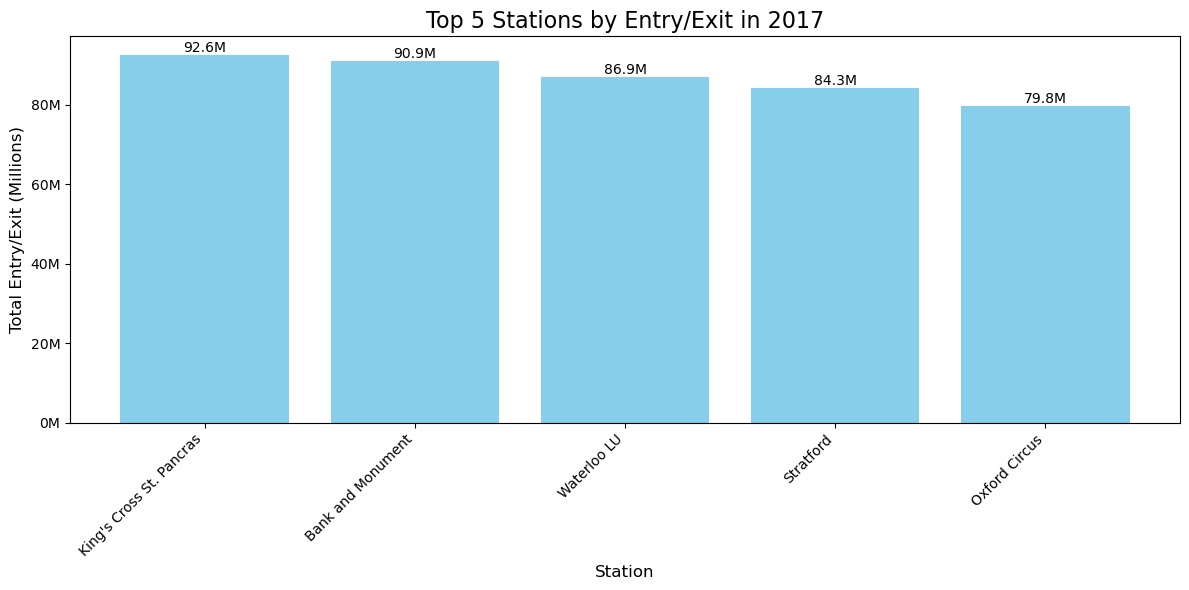

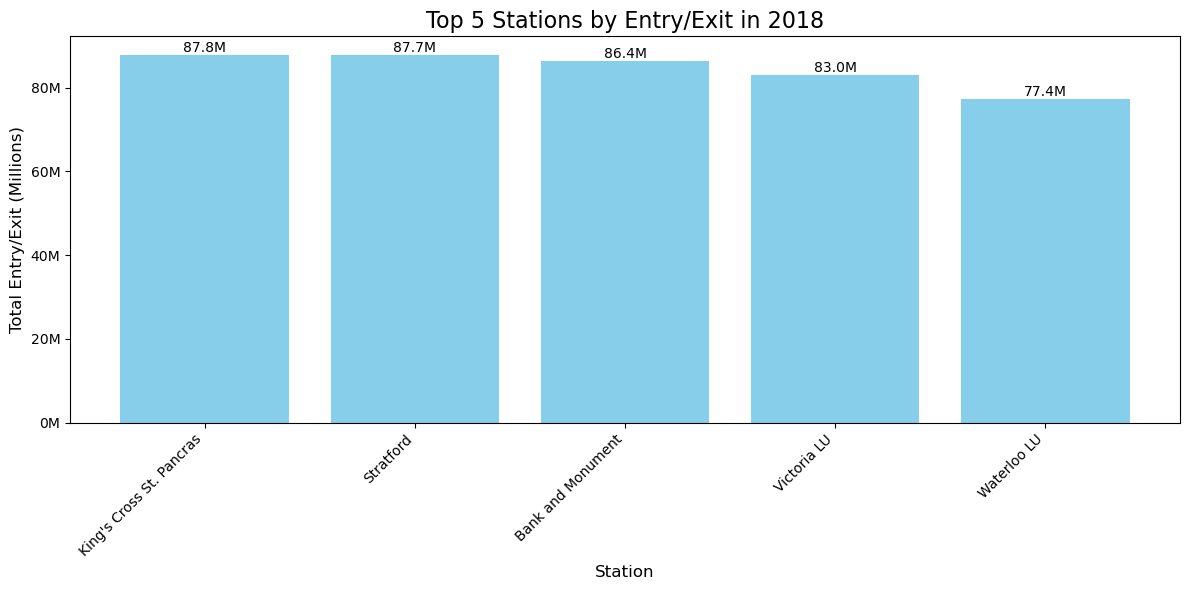

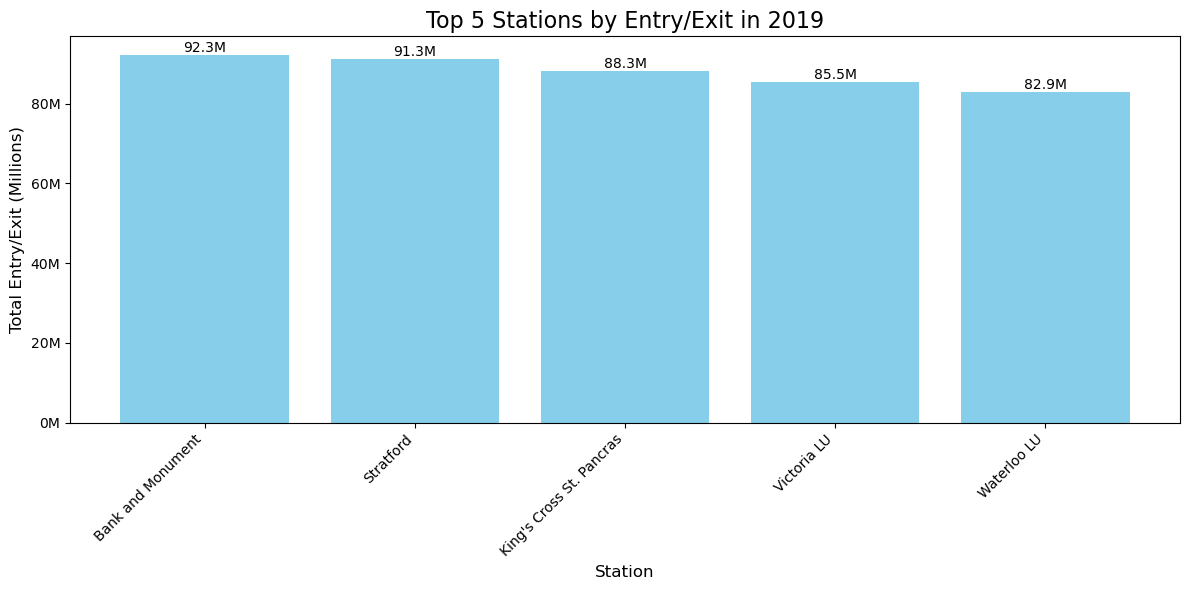

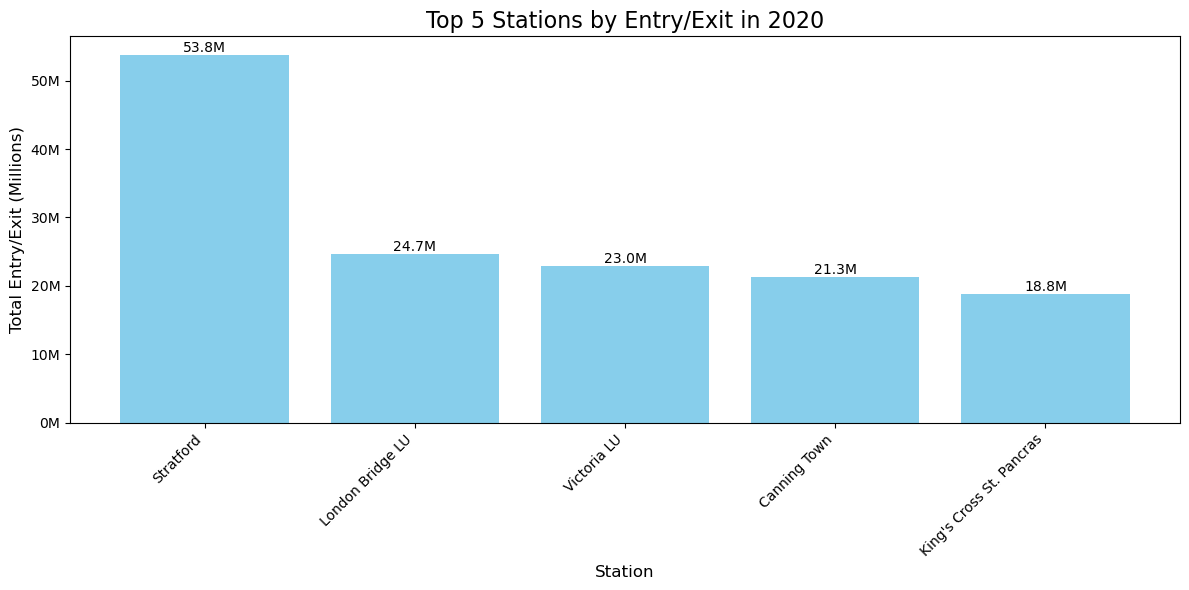

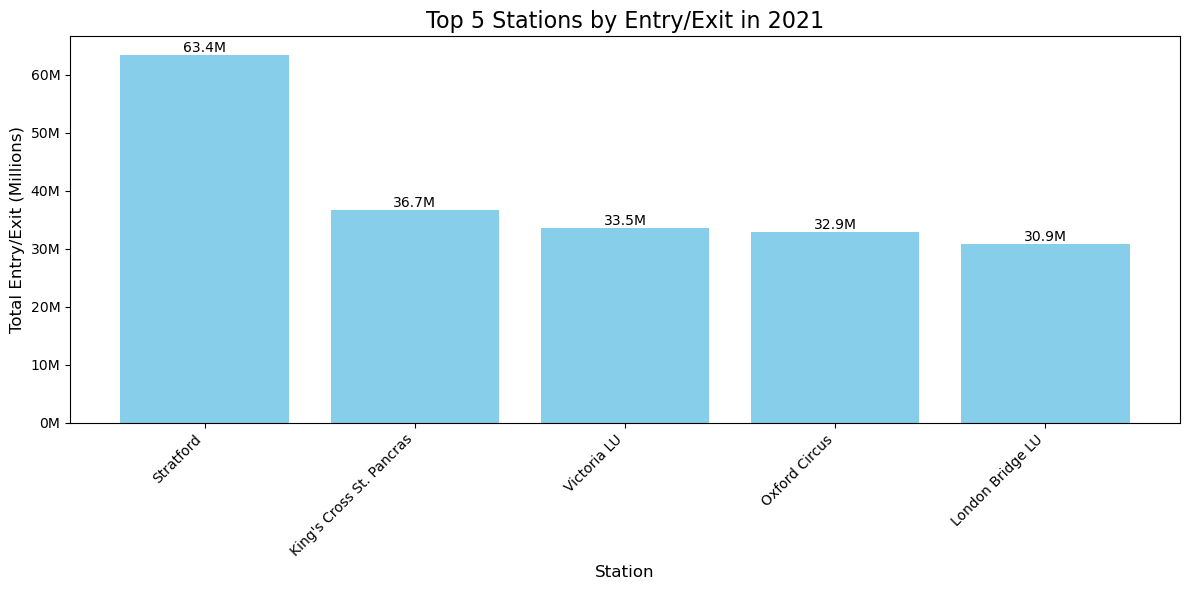

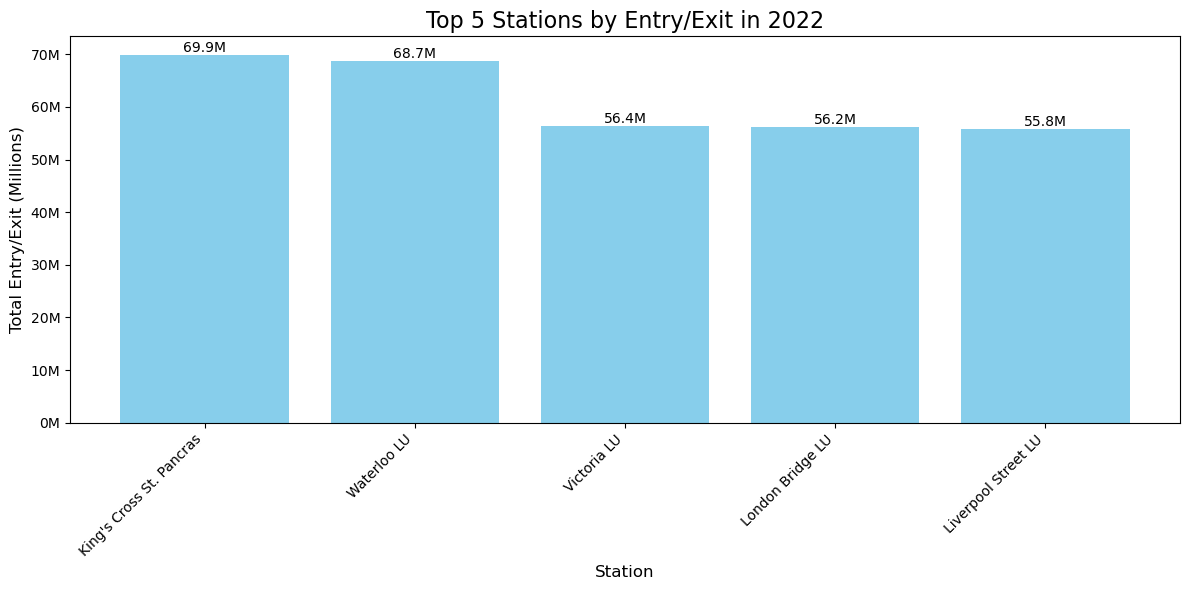

In [108]:
import matplotlib.pyplot as plt

def plot_top_5_stations_by_year(dataframes, years):
    for df, year in zip(dataframes, years):
        plt.figure(figsize=(12, 6))
        
        top_5 = df.nlargest(5, 'Total Entry/Exit')
        
        # Create bar plot
        bars = plt.bar(top_5['Station'], top_5['Total Entry/Exit'] / 1e6, color='skyblue')
        
        plt.title(f'Top 5 Stations by Entry/Exit in {year}', fontsize=16)
        plt.xlabel('Station', fontsize=12)
        plt.ylabel('Total Entry/Exit (Millions)', fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        
        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.1f}M',
                     ha='center', va='bottom')
        
        # Format y-axis to millions
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}M'))
        
        plt.show()

# Create plots for each year
plot_top_5_stations_by_year(
    [df2017ac_combined, df2018ac_combined, df2019ac_combined, 
     df2020ac_combined, df2021ac_combined, df2022ac_combined],
    ['2017', '2018', '2019', '2020', '2021', '2022']
)

/var/folders/by/t0ff8bfj75j9v_3003xq_y0h0000gn/T/ipykernel_65604/619240062.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_5['Station'], rotation=45, ha='right', fontsize=8)
/var/folders/by/t0ff8bfj75j9v_3003xq_y0h0000gn/T/ipykernel_65604/619240062.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_5['Station'], rotation=45, ha='right', fontsize=8)
/var/folders/by/t0ff8bfj75j9v_3003xq_y0h0000gn/T/ipykernel_65604/619240062.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_5['Station'], rotation=45, ha='right', fontsize=8)
/var/folders/by/t0ff8bfj75j9v_3003xq_y0h0000gn/T/ipykernel_65604/619240062.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_5['Station'], rotation=45, ha='right', fontsize=8)
/var/folders/by/t0ff8bfj75j9v_3003xq_y0h0000gn/T/ipykernel_65604/619

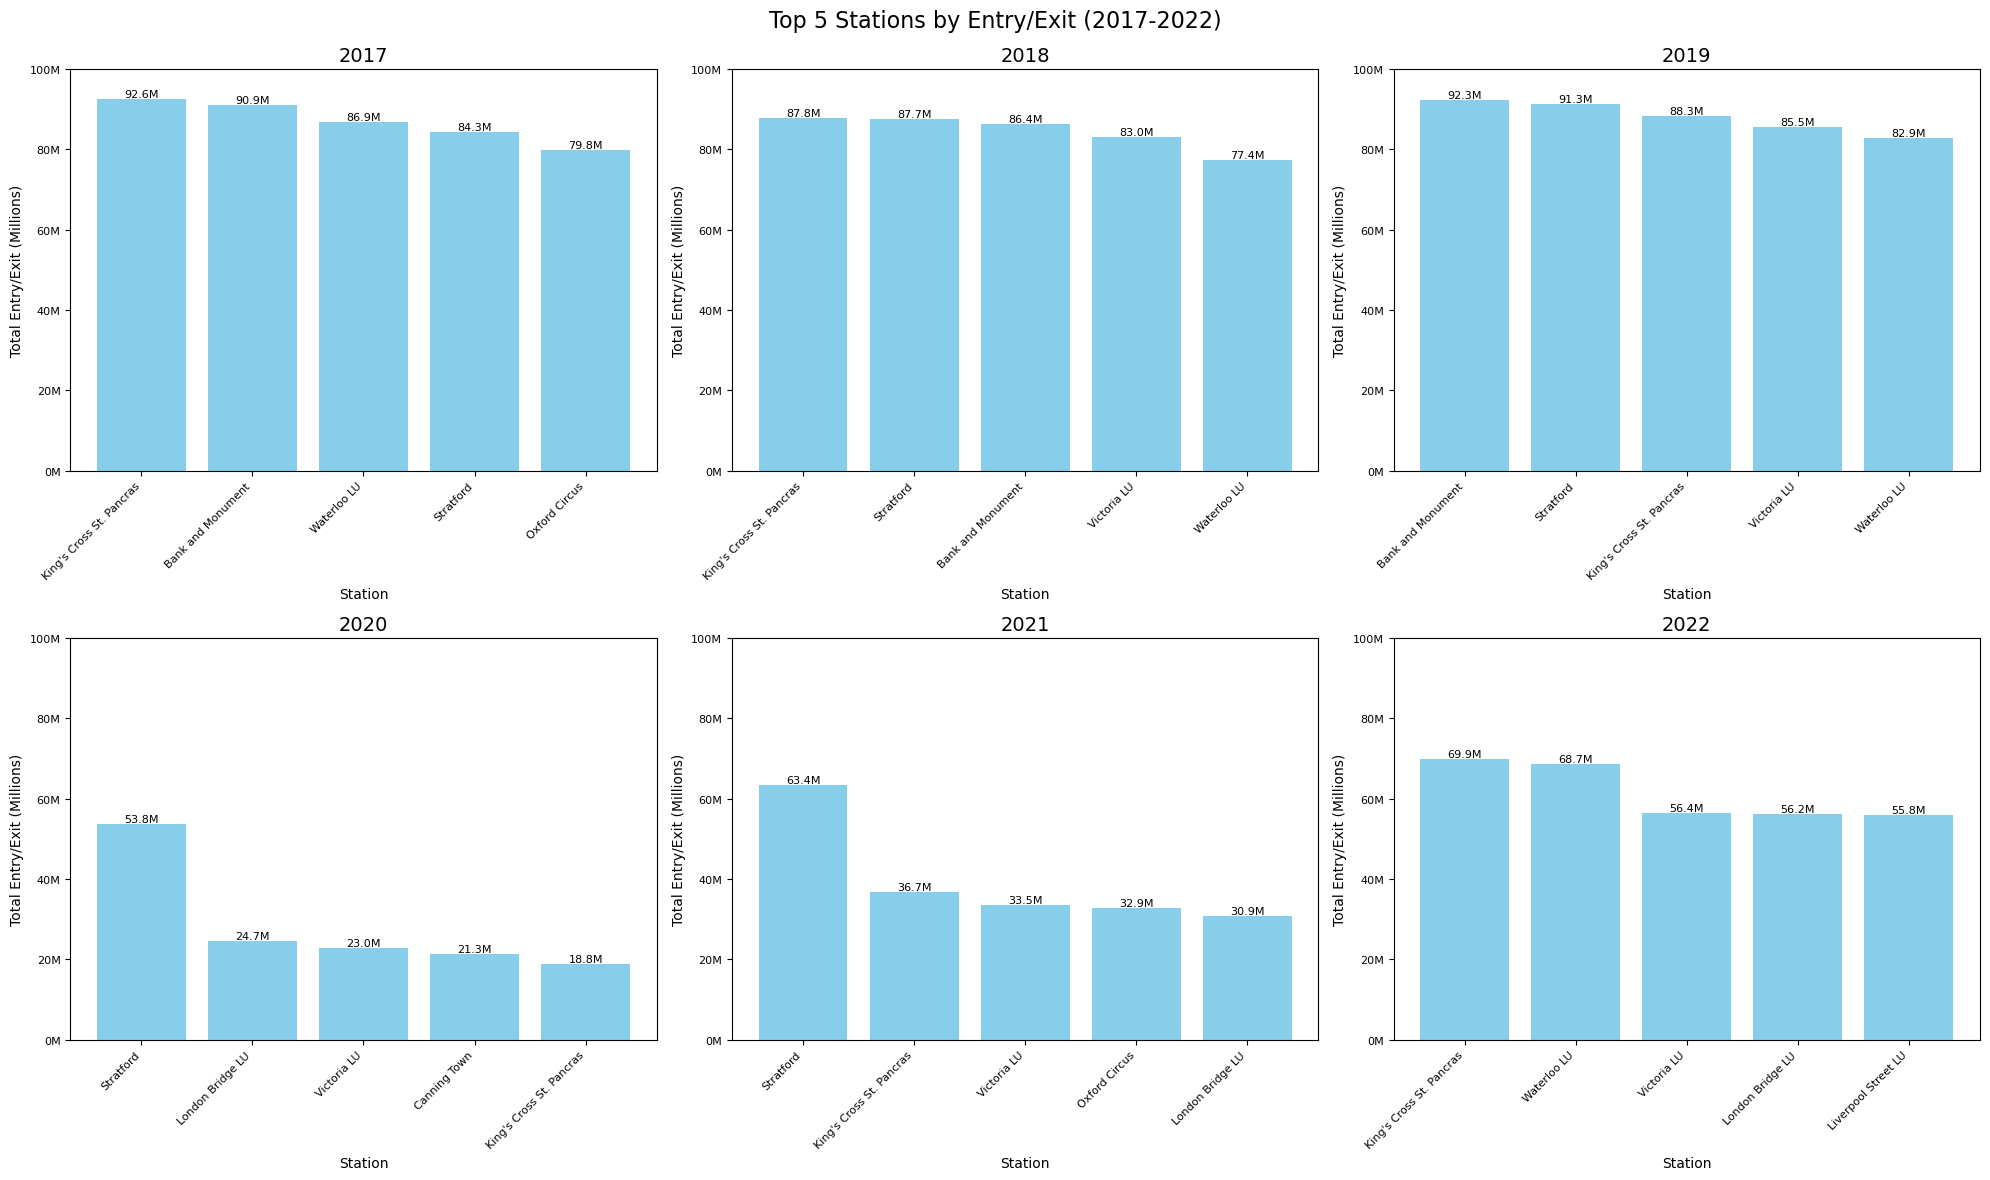

In [112]:
import matplotlib.pyplot as plt

def plot_top_5_stations_by_year(dataframes, years):
    fig, axs = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Top 5 Stations by Entry/Exit (2017-2022)', fontsize=16)

    for df, year, ax in zip(dataframes, years, axs.flatten()):
        top_5 = df.nlargest(5, 'Total Entry/Exit')
        
        # Create bar plot
        bars = ax.bar(top_5['Station'], top_5['Total Entry/Exit'] / 1e6, color='skyblue')
        
        ax.set_title(f'{year}', fontsize=14)
        ax.set_xlabel('Station', fontsize=10)
        ax.set_ylabel('Total Entry/Exit (Millions)', fontsize=10)
        
        # Rotate x-axis labels
        ax.set_xticklabels(top_5['Station'], rotation=45, ha='right', fontsize=8)
        
        ax.tick_params(axis='y', labelsize=8)
        
        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}M',
                    ha='center', va='bottom', fontsize=8)
        
        # Format y-axis to millions
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}M'))
        ax.set_ylim(0, 100)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)  # Adjust to make room for the main title
    plt.show()

# Create plots for each year
plot_top_5_stations_by_year(
    [df2017ac_combined, df2018ac_combined, df2019ac_combined, 
     df2020ac_combined, df2021ac_combined, df2022ac_combined],
    ['2017', '2018', '2019', '2020', '2021', '2022']
)

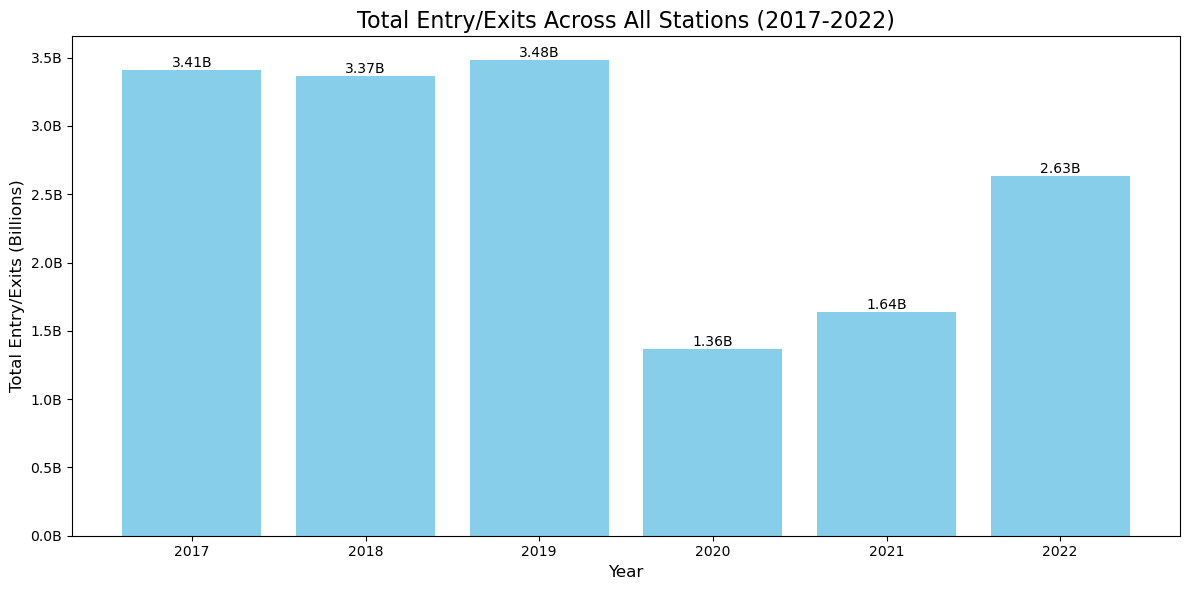

In [116]:
def plot_total_entry_exits_by_year(dataframes, years):
    total_entries = [df['Total Entry/Exit'].sum() / 1e9 for df in dataframes]  # Convert to billions

    plt.figure(figsize=(12, 6))
    bars = plt.bar(years, total_entries, color='skyblue')
    
    plt.title('Total Entry/Exits Across All Stations (2017-2022)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Entry/Exits (Billions)', fontsize=12)
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}B',
                 ha='center', va='bottom', fontsize=10)
    
    # Format y-axis to billions
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}B'))
    
    plt.tight_layout()
    plt.show()

# Create the plot
plot_total_entry_exits_by_year(
    [df2017ac_combined, df2018ac_combined, df2019ac_combined, 
     df2020ac_combined, df2021ac_combined, df2022ac_combined],
    ['2017', '2018', '2019', '2020', '2021', '2022']
)